# Reto | Análisis para abrir una nueva sucursal de comida rápida en México

## Se importan todas las librerías

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, LineString

In [3]:
!pip install rtree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 5.5 MB/s eta 0:00:00


## 2.	Carga los datos de los Estados de la República Mexicana en un GeoDataFrame.

In [10]:
estados = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/DataSets/Mapa_mex/mexican-states.shp")

#Se guardan solo las columnas importantes
estados = estados.loc[:,["ISO3166-2", "name", "geometry"]]

estados.head()

,ISO3166-2,name,geometry
0,MX-AGU,Aguascalientes,"POLYGON ((-102.74530 21.72005, -102.74859 21.7..."
1,MX-COL,Colima,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."
2,MX-TLA,Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460..."
3,MX-CMX,Ciudad de México,"POLYGON ((-99.27870 19.13170, -99.28259 19.138..."
4,MX-MOR,Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038..."


In [11]:
estados.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ISO3166-2  32 non-null     object  
 1   name       32 non-null     object  
 2   geometry   32 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 896.0+ bytes


## 3.	Carga los datos de la localización de las sucursales de Costco® en un DataFrame.

In [14]:
base_costco = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/tiendasCostco_.csv")

base_costco.head()

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.033499,-98.237794,222 2273 318
1,2,"""Villa Coapa""",Puente 186,Coapa,19.284359,-99.138655,NaN
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.934481,-99.233430,777 7101 523
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.130063,55 5747 5691
4,5,"""Mixcoac""",Blvd. Adolfo López Mateos 1181,Alvaro Obregón,19.387237,-99.190718,NaN


## 4.	Convierte los datos de la localización de las sucursales de Costco® en un GeoDataFrame, creando puntos a partir de la longitud y latitud de cada sucursal.

In [67]:
costco_loc = gpd.GeoDataFrame(base_costco, geometry = gpd.points_from_xy(base_costco[" longitud"], base_costco[" latitud"]), crs="epsg:4326")

costco_loc.head()

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero,geometry
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.033499,-98.237794,222 2273 318,POINT (-98.23779 19.03350)
1,2,"""Villa Coapa""",Puente 186,Coapa,19.284359,-99.138655,NaN,POINT (-99.13865 19.28436)
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.934481,-99.233430,777 7101 523,POINT (-99.23343 18.93448)
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.130063,55 5747 5691,POINT (-99.13006 19.48170)
4,5,"""Mixcoac""",Blvd. Adolfo López Mateos 1181,Alvaro Obregón,19.387237,-99.190718,NaN,POINT (-99.19072 19.38724)


## 5.	Agrega una columna a los estados que indique la región a la que pertenecen y separa el GeoDataFrame por regiones en lugar de por estados:
a)	Centro: Tlaxcala, Puebla, CDMX, Morelos, Estado de México e Hidalgo

b)	Centro Oeste: Jalisco, Michoacán, Colima, Aguascalientes, Nayarit, Zacatecas, San Luis Potosí, Guanajuato y Querétaro.

c)	Noreste: Chihuahua, Coahuila, Nuevo León, Tamaulipas y Durango

d)	Noroeste: Baja California Norte, Baja California Sur, Sonora y Sinaloa

e)	Sureste: Guerrero, Veracruz, Oaxaca, Tabasco, Chiapas, Campeche, Yucatán y Quintana Roo

In [28]:
estados["Región"] = "En espera"

#Se agrupan los estados del centro
estados.iloc[[2,7,3,4,5,6], 3] = "Centro"

#Se agrupan los estados del centro oeste
estados.iloc[[15,12,1,0,16,23,13,13,29,14],3] = "Centro Oeste"

#Se agrupan los estados del noreste
estados.iloc[[10,9,8,17,18],3] = "Noreste"

#Se agrupan los estados del noroeste
estados.iloc[[27,28,11,21],3] = "Noroeste"

#Se agrupan los estados del noroeste
estados.iloc[[19,20,22,24,26,26,30,31,25],3] = "Sureste"

estados

,ISO3166-2,name,geometry,Región
0,MX-AGU,Aguascalientes,"POLYGON ((-102.74530 21.72005, -102.74859 21.7...",Centro Oeste
1,MX-COL,Colima,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884...",Centro Oeste
2,MX-TLA,Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460...",Centro
3,MX-CMX,Ciudad de México,"POLYGON ((-99.27870 19.13170, -99.28259 19.138...",Centro
4,MX-MOR,Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038...",Centro
5,MX-MEX,México,"POLYGON ((-100.13794 20.04431, -100.13759 20.0...",Centro
6,MX-HID,Hidalgo,"POLYGON ((-99.73527 20.56486, -99.73525 20.564...",Centro
7,MX-PUE,Puebla,"POLYGON ((-97.26671 19.38249, -97.26549 19.381...",Centro
8,MX-NLE,Nuevo León,"POLYGON ((-99.94766 23.49713, -99.94611 23.490...",Noreste
9,MX-COA,Coahuila de Zaragoza,"POLYGON ((-103.50895 25.27801, -103.50984 25.2...",Noreste


In [34]:
#Se agrupan los polígonos por su región
regiones = estados.dissolve(by="Región", aggfunc="sum")

regiones

,geometry,ISO3166-2,name
Región,,,
Centro,"POLYGON ((-99.06596 18.33265, -99.06612 18.333...",MX-TLAMX-CMXMX-MORMX-MEXMX-HIDMX-PUE,TlaxcalaCiudad de MéxicoMorelosMéxicoHidalgoPu...
Centro Oeste,"MULTIPOLYGON (((-106.24013 21.33311, -106.2398...",MX-AGUMX-COLMX-MICMX-QUEMX-GUAMX-JALMX-ZACMX-N...,AguascalientesColimaMichoacán de OcampoQueréta...
Noreste,"POLYGON ((-104.24942 22.74840, -104.24981 22.7...",MX-NLEMX-COAMX-CHHMX-DURMX-TAM,Nuevo LeónCoahuila de ZaragozaChihuahuaDurango...
Noroeste,"MULTIPOLYGON (((-114.29280 27.11006, -114.2928...",MX-SONMX-SINMX-BCNMX-BCS,SonoraSinaloaBaja CaliforniaBaja California Sur
Sureste,"MULTIPOLYGON (((-96.05972 15.77985, -96.06001 ...",MX-VERMX-GROMX-OAXMX-CHPMX-TABMX-CAMMX-YUCMX-ROO,Veracruz de Ignacio de la LlaveGuerreroOaxacaC...


<Axes: >

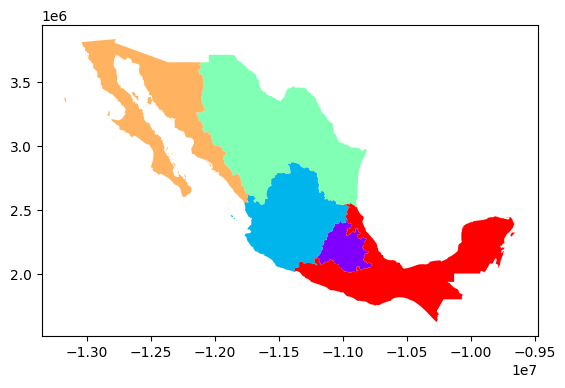

In [55]:
#Se grafica
regiones.plot(cmap="rainbow")

## 6.	Asegura que ambos GeoDataFrames utilicen el CRS epsg=3395 que usa metros como medida de distancia.

In [49]:
estados = estados.to_crs(epsg=3395)
regiones = regiones.to_crs(epsg=3395)

estados.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
regiones.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [69]:
costco_loc = costco_loc.to_crs(epsg=3395)


## 7.	Crea un buffer de 120 km alrededor de los puntos de localización de cada sucursal.

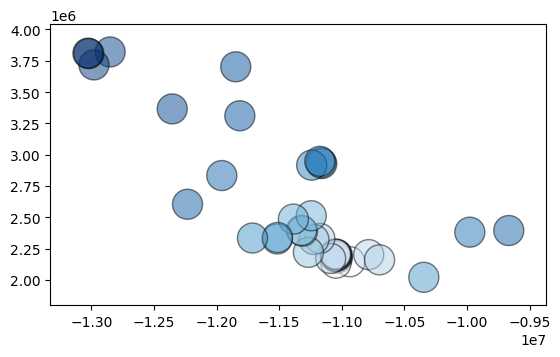

In [86]:
radio_120km = costco_loc.buffer(120000)

zona_entrega = gpd.GeoDataFrame(base_costco, geometry = radio_120km)

zona_entrega.plot(cmap="Blues", alpha=0.5, edgecolor="black");

## 8.	Grafica la intersección de las regiones con los círculos creados a partir de la localización de las sucursales.

<Axes: >

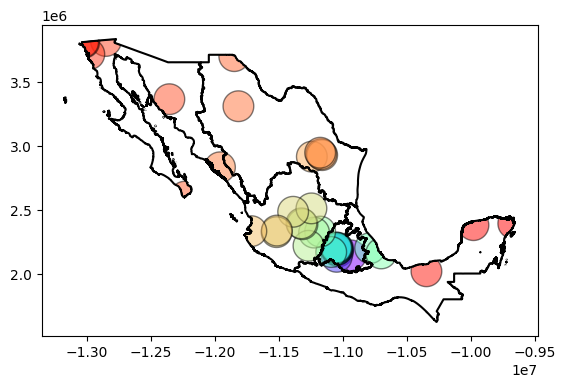

In [83]:
#Se hace la intersección con las zonas de entrega
interseccion = gpd.overlay(regiones,zona_entrega, how="intersection")

ax = regiones.boundary.plot(color="black");
interseccion.plot(ax=ax, cmap="rainbow", alpha=0.5, edgecolor="black")